In [1]:
import pandas as pd # load and manipulate data and for One-Hot Encoding
import numpy as np # calculate the mean and standard deviation
import xgboost as xgb # XGBoost stuff
import catboost as cb
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
##SKLearn for Machine Model Tools

from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
import xgboost as xgb # XGBoost stuff



In [2]:
def dataframe_overview(df):
    print("DataFrame info:")
    print("--------------------")
    print(df.info())
    print("\nDescribe DataFrame:")
    print("---------------------------------------------")
    print(df.describe())
    print("\nCount(Distinct):")
    print("-------------------------")
    print(df.nunique())
    print(f"\nNumber of observations: {df.shape[0]}")
    print("\nData Types:")
    print("-----------")
    print(df.dtypes)
    ##titanic_df_train.isna().sum()
    print("\nIsNASum:")
    print("-----------")
    print(df.isna().sum())


In [3]:
heartkagglefile = "D:\\Downloads\\heart.csv"

heartdf=pd.read_csv(heartkagglefile, sep=',', header = 0) 

In [4]:
dataframe_overview(heartdf)

DataFrame info:
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Describe DataFrame:
---------------------------------------------
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.

In [5]:
heartdf.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



# ML Step #3: Data Preparation, Feature Engineering
###### Variable by Variable


#### Ensuring Data Is Tidy
#### Handling Missing Data
#### Label Encoding
#### Transforming Continuous variables
#### Recoding Categorical Variables



In [6]:


heartdf['Sex'] = heartdf['Sex'].map({'F': 0, 'M': 1})


heartdf['Sex'] = heartdf['Sex'].astype(float)





In [7]:
heartdfencoded = pd.get_dummies(heartdf, columns=['ChestPainType', 
                                       'RestingECG', 
                                       'ExerciseAngina', 
                                       'ST_Slope'])
heartdfencoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1.0,140,289,0,172,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1
1,49,0.0,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0,0,1,0
2,37,1.0,130,283,0,98,0.0,0,0,1,0,0,0,0,1,1,0,0,0,1
3,48,0.0,138,214,0,108,1.5,1,1,0,0,0,0,1,0,0,1,0,1,0
4,54,1.0,150,195,0,122,0.0,0,0,0,1,0,0,1,0,1,0,0,0,1


In [12]:

##Split up our data



from sklearn.model_selection import train_test_split

# Initial split: 90% train, 10% temporary (for validation and test)
train_df, test_df = train_test_split(heartdfencoded, test_size=0.3)





In [15]:

y_train = train_df['HeartDisease']
y_test = train_df['HeartDisease']

x_train = test_df.drop('HeartDisease', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1]

x_test = test_df.drop('HeartDisease', axis=1).copy()

### Last Data Preparation Steps

Dropping unused variables
Creating Dummy variables
Scaling variables

Splitting up our Label, or variable that we are predicting, and the rest of our feature variables

In [21]:

y_train = train_df['HeartDisease']
y_test = test_df['HeartDisease']

x_train = train_df.drop('HeartDisease', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1]

x_test = test_df.drop('HeartDisease', axis=1).copy()


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# ML Step #4:  Model Selection

### XGBoost, ADABoost, Random Forest, SVM, Voting Classifer








# ML Step #5-7:  Model Training, Parameter Tuning, Model Evaluation

### XGBoost


In [19]:
len(x_train)

276

In [22]:


clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            eval_metric="logloss", ## this avoids a warning...
                            seed=42, 
                            use_label_encoder=False)
## NOTE: newer versions of XGBoost will issue a warning if you don't explitly tell it that
## you are not expecting it to do label encoding on its own (in other words, since we
## have ensured that the categorical values are all numeric, we do not expect XGBoost to do label encoding), 
## so we set use_label_encoder=False

clf_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

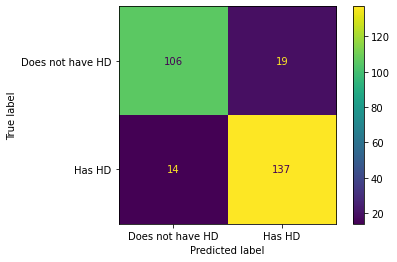

In [23]:
plot_confusion_matrix(clf_xgb, x_test, y_test, display_labels=["Does not have HD", "Has HD"])

In [25]:
from sklearn.metrics import accuracy_score

y_pred = clf_xgb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8804347826086957


In [26]:
## NOTE: This code takes a few minutes to run, so I've commented it out.
## Since I set seed=42, we'll get the same results anyway, and those are
## coded into the next section...

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'n_estimators': range(50, 250, 50),
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0, 1.0, 10.0, 100.0]
}

optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric="logloss", seed=77, use_label_encoder=False),
    param_grid=param_grid,
#     scoring = 'roc_auc',## For more scoring metics see: 
        ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    verbose=0, # NOTE: If you want to see what Grid Search is doing, set verbose=2
    n_jobs = 10,
    cv = 5
)

optimal_params.fit(x_train, y_train)
print(optimal_params.best_params_)









{'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'reg_lambda': 1.0}


In [28]:
clf_xgb = xgb.XGBClassifier(seed=77,
                        objective='binary:logistic',
                        eval_metric="logloss", ## this avoids a warning...
                        gamma=1,
                        learning_rate=0.1,
                        max_depth=3,
                        n_estimators=50,
                        reg_lambda=1,
                        use_label_encoder=False)
clf_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=77,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=77,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

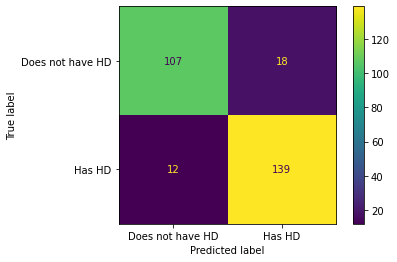

In [29]:

plot_confusion_matrix(clf_xgb, x_test, y_test, display_labels=["Does not have HD", "Has HD"])

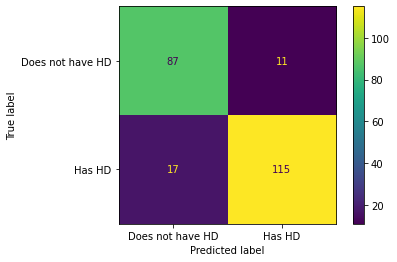

In [17]:

clf_xgb = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            eval_metric="logloss", ## this avoids a warning...
                            gamma=1,
                            learning_rate=0.1,
                            max_depth=8,
                            n_estimators=100, ## We set this to 1 so we can get gain, cover etc.
                            reg_lambda=10,
                            use_label_encoder=False)
clf_xgb.fit(X_train, y_train)




plot_confusion_matrix(clf_xgb, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

In [30]:
from sklearn.metrics import accuracy_score

y_pred = clf_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8913043478260869


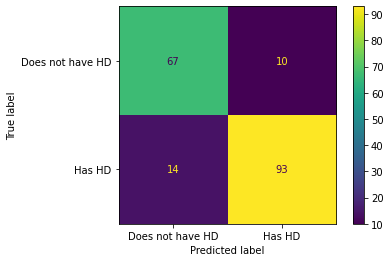

In [24]:

plot_confusion_matrix(model, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

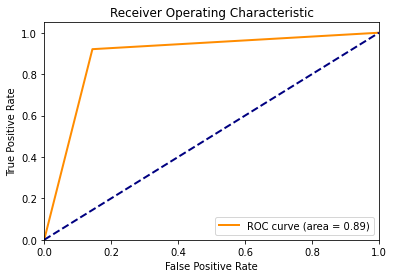

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [36]:
from sklearn.ensemble import AdaBoostClassifier



clf_adaboost = AdaBoostClassifier(random_state=42)

# Define hyperparameter grid for AdaBoost
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0]
}

# GridSearchCV setup
grid_search = GridSearchCV(clf_adaboost, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(x_train, y_train)

# Getting the best AdaBoost model from the grid search
clf_adaboost_optimized = grid_search.best_estimator_

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters for AdaBoost Classifier:")
print(grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Optionally, print the detailed classification report
best_ada = grid_search.best_estimator_
test_predictions = best_ada.predict(x_test)







Best Hyperparameters for AdaBoost Classifier:
{'learning_rate': 0.1, 'n_estimators': 100}
Best score:  0.8644622093023255


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report


# Define the parameter grid, including the 'criterion' parameter



# Define the parameter grid, including the 'criterion' parameter
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for split quality
    'n_estimators': [10,25,50,100, 150, 200, 250, 300],   # Number of trees in the forest
    'max_depth': [None, 5,6,7,8,9,10, 13,15, 20,25, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]         # Whether bootstrap samples are used when building trees
}

# Initialize the classifier
rf = RandomForestClassifier()

# Initialize GridSearchCV with the classifier, parameter grid, and number of folds for cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Optionally, print the detailed classification report
best_rf = grid_search.best_estimator_
print("best Estimator: ", best_rf)





Fitting 3 folds for each of 3456 candidates, totalling 10368 fits
Best parameters found:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 25}
Best score:  0.8707165109034268
best Estimator:  RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=25)


In [ ]:
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report



# Define the parameter grid, including the 'criterion' parameter
params = {
    'n_estimators': [250],
    'criterion': ['gini'],
    'max_depth': [9],
    ##'min_samples_split' : [10],
    'random_state': [888],
}

# Initialize the classifier
rf = RandomForestClassifier()

# Initialize GridSearchCV with the classifier, parameter grid, and number of folds for cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=4, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Optionally, print the detailed classification report
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)





In [39]:

from sklearn.svm import SVC
# Initialize SVM
svm = SVC()

# Define hyperparameter options
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly'],
    'random_state' : [42],
}

# Create GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the model
grid_search.fit(x_train, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the model
# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("Best estim: ", grid_search.best_estimator_)

best_svm = grid_search.best_estimator_
test_predictions = best_svm.predict(x_test)




Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 42}
Best score: 0.8644500968992247
Best parameters found:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 42}
Best score:  0.8644500968992247
Best estim:  SVC(C=1, random_state=42)


In [42]:

##Fitting 3 folds for each of 3456 candidates, totalling 10368 fits
##Best parameters found:  {'bootstrap': True,
##'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 25}


##Code to show how correlated the Random Forest and SVM Models are

# RandomForestClassifier instantiation
rf_model = RandomForestClassifier(random_state=888, n_estimators=25, criterion='gini', max_depth=10, 
                                  min_samples_split=10, min_samples_leaf=1, bootstrap=True)

# SVC instantiation
svm_model = SVC(probability=True, random_state=42, C=1, gamma='scale', kernel='rbf')

# Fit both models separately
rf_model.fit(x_train, y_train)
svm_model.fit(x_train, y_train)

# Predict on test data
rf_predictions = rf_model.predict(x_test)
svm_predictions = svm_model.predict(x_test)

# Calculate the correlation between the two sets of predictions
correlation = np.corrcoef(rf_predictions, svm_predictions)[0, 1]

print(f"Correlation between RandomForest and SVM predictions: {correlation}")


Correlation between RandomForest and SVM predictions: 0.8883620839039826


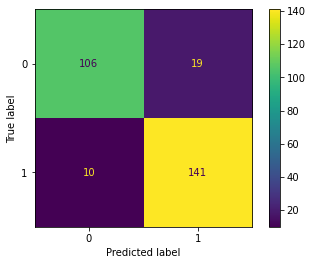

In [44]:


# Create voting classifier with added SVM
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_model),

        ('svm', svm_model)  # Add SVM model here
    ],
    voting='soft'  # Use 'soft' for probability-based voting
)

voting_clf.fit(x_train, y_train)


y_train_pred = voting_clf.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

test_predictions = voting_clf.predict(x_test)


plot_confusion_matrix(voting_clf, x_test, y_test)  # voting_clf is your trained model


In [45]:
print(train_accuracy)

0.9174454828660437


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
# Note: Set the `average` parameter according to your problem.
# For binary classification, it can be 'binary'. For multiclass, you might use 'micro', 'macro', or 'weighted'.
precision = precision_score(y_test, test_predictions, average='macro')
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, test_predictions, average='macro')
print(f"Recall: {recall:.4f}")

Accuracy: 0.8949
Precision: 0.8975
Recall: 0.8909
